<a href="https://colab.research.google.com/github/Prasanna-k-Nalabolu/M-P-1/blob/main/tweets_deeplearning_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load and explore the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('olid-training-v1.0 (2).tsv', sep='\	')

# Display basic information
print("Dataset shape:", df.shape)
print("\
First 5 rows of the dataset:")
print(df.head())



Dataset shape: (13240, 5)
First 5 rows of the dataset:
      id                                              tweet subtask_a  \
0  86426  @USER She should ask a few native Americans wh...       OFF   
1  90194  @USER @USER Go home you’re drunk!!! @USER #MAG...       OFF   
2  16820  Amazon is investigating Chinese employees who ...       NOT   
3  62688  "@USER Someone should'veTaken"" this piece of ...       OFF   
4  43605  @USER @USER Obama wanted liberals &amp; illega...       NOT   

  subtask_b subtask_c  
0       UNT       NaN  
1       TIN       IND  
2       NaN       NaN  
3       UNT       NaN  
4       NaN       NaN  


<ipython-input-1-b118a61a4631>:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('olid-training-v1.0 (2).tsv', sep='\	')


In [ ]:
# Display column information
print("\
Column information:")
print(df.info())



Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         13240 non-null  int64 
 1   tweet      13240 non-null  object
 2   subtask_a  13240 non-null  object
 3   subtask_b  4400 non-null   object
 4   subtask_c  3876 non-null   object
dtypes: int64(1), object(4)
memory usage: 517.3+ KB
None


In [ ]:
# Check for null values
print("\
Null values in each column:")
print(df.isnull().sum())



Null values in each column:
id              0
tweet           0
subtask_a       0
subtask_b    8840
subtask_c    9364
dtype: int64


In [ ]:
# Descriptive statistics
print("\
Descriptive statistics:")
print(df.describe(include='all'))



Descriptive statistics:
                  id                                              tweet  \
count   13240.000000                                              13240   
unique           NaN                                              13207   
top              NaN  @USER Looks Like The Jokes On Liberals Again. ...   
freq             NaN                                                  6   
mean    54881.766163                                                NaN   
std     26092.681658                                                NaN   
min     10006.000000                                                NaN   
25%     32235.750000                                                NaN   
50%     54852.000000                                                NaN   
75%     77743.250000                                                NaN   
max     99986.000000                                                NaN   

       subtask_a subtask_b subtask_c  
count      13240      4400      3876

In [ ]:
# Check class distribution for subtask_a
print("\
Class distribution for subtask_a:")
print(df['subtask_a'].value_counts())
print(df['subtask_a'].value_counts(normalize=True).round(3) * 100)

Class distribution for subtask_a:
subtask_a
NOT    8840
OFF    4400
Name: count, dtype: int64
subtask_a
NOT    66.8
OFF    33.2
Name: proportion, dtype: float64


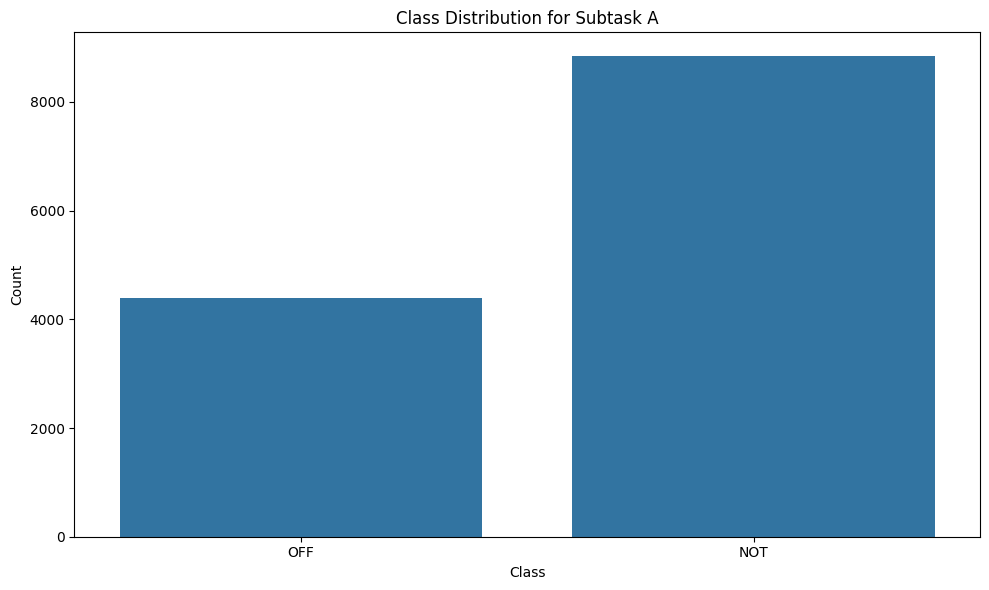

In [ ]:
# Visualize class distribution for subtask_a
plt.figure(figsize=(10, 6))
sns.countplot(x='subtask_a', data=df)
plt.title('Class Distribution for Subtask A')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

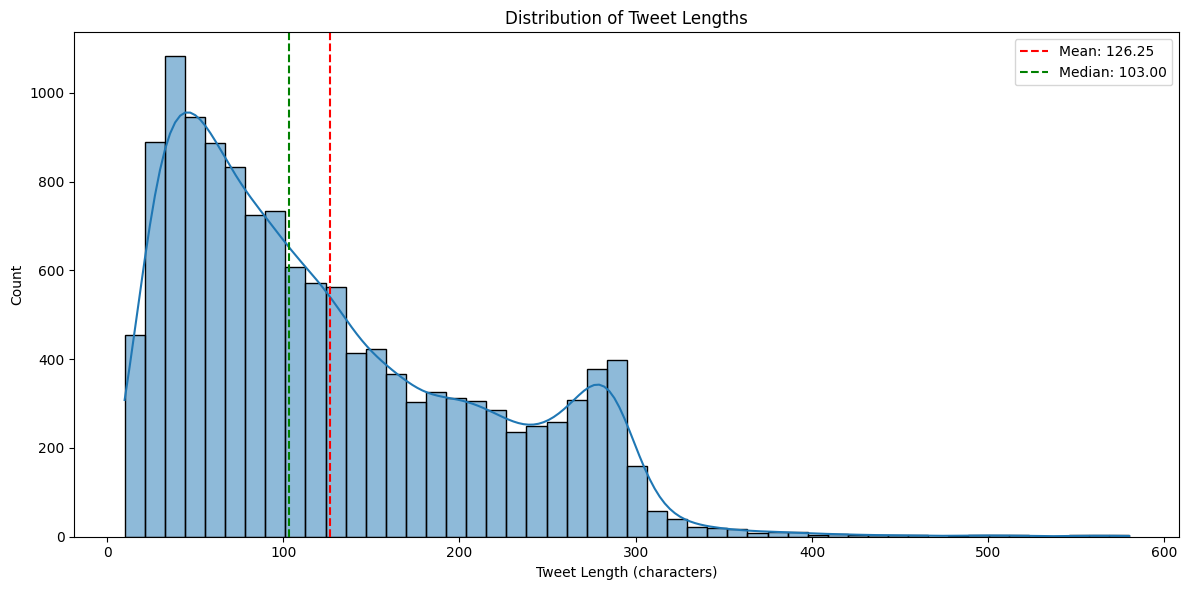

In [ ]:

# Check tweet length distribution
df['tweet_length'] = df['tweet'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tweet_length', bins=50, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Count')
plt.axvline(x=df['tweet_length'].mean(), color='red', linestyle='--', label=f'Mean: {df["tweet_length"].mean():.2f}')
plt.axvline(x=df['tweet_length'].median(), color='green', linestyle='--', label=f'Median: {df["tweet_length"].median():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

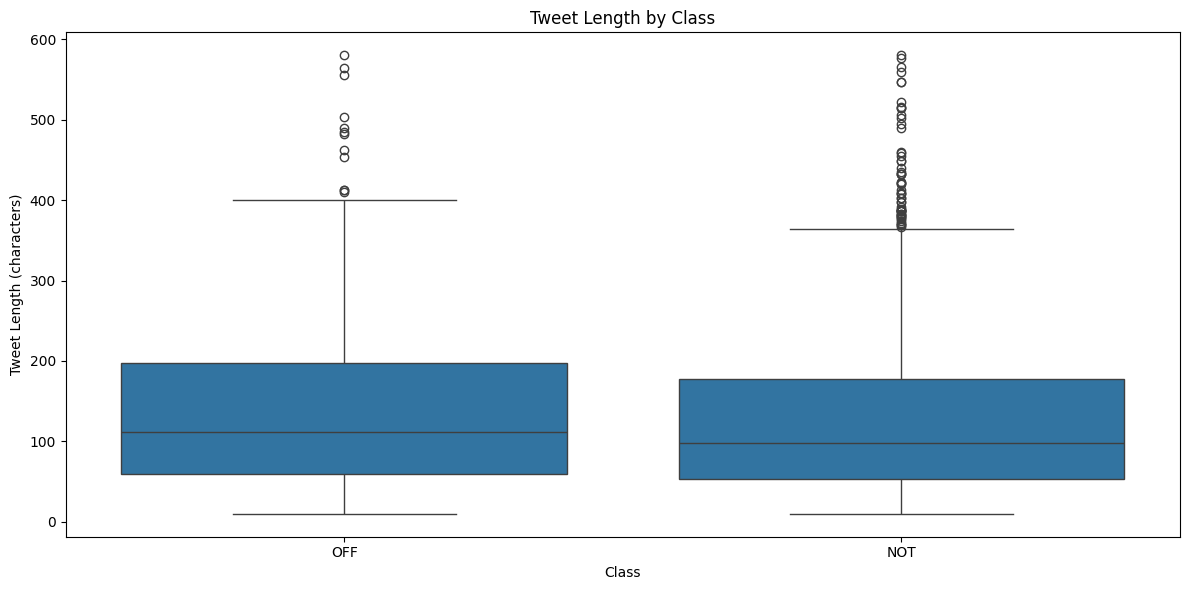

In [ ]:
# Tweet length by class
plt.figure(figsize=(12, 6))
sns.boxplot(x='subtask_a', y='tweet_length', data=df)
plt.title('Tweet Length by Class')
plt.xlabel('Class')
plt.ylabel('Tweet Length (characters)')
plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


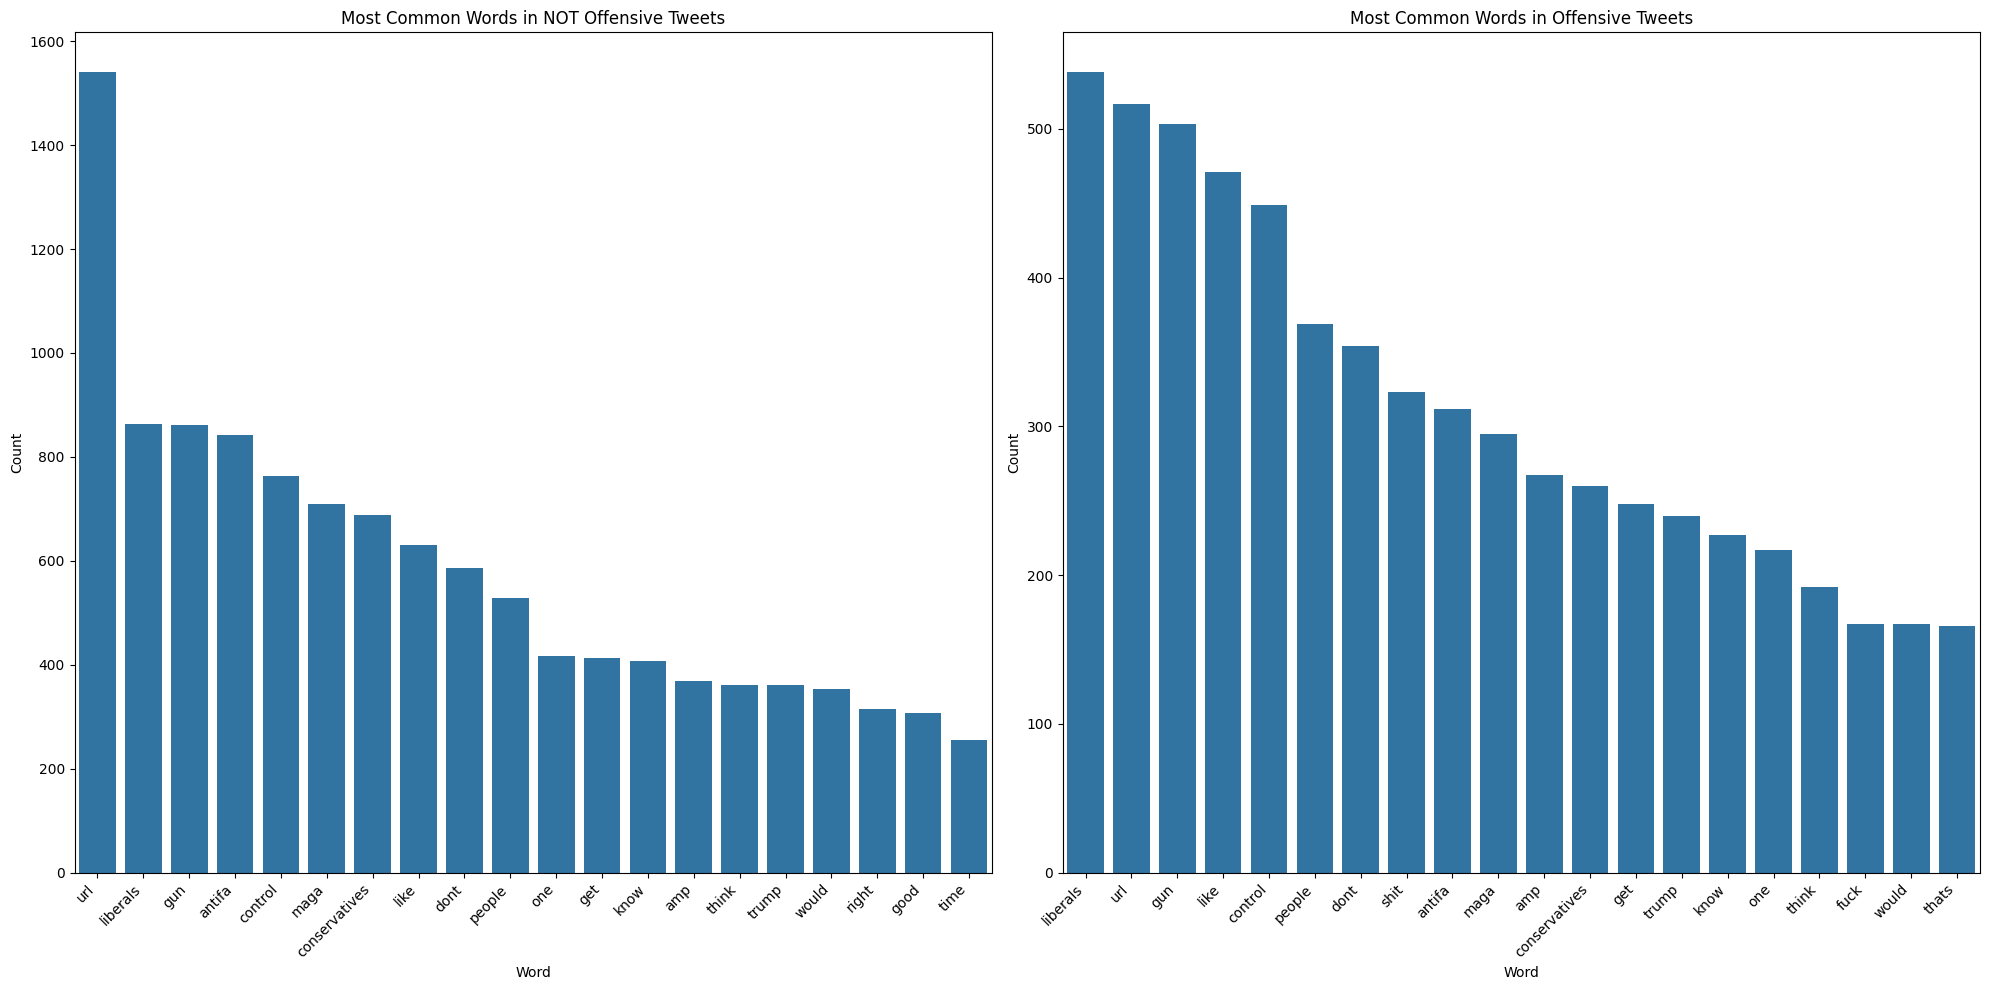

In [ ]:
# Check for common words in tweets
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
import nltk
nltk.download('punkt_tab')

# Download necessary NLTK resources
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Function to extract words from tweets
def extract_words(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'@user', '', text)  # Remove @USER
    text = re.sub(r'#(\w+)', r'\1', text)  # Remove hashtag symbol
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and len(word) > 2]
    return words

# Get words for each class
not_words = []
off_words = []

for _, row in df.iterrows():
    words = extract_words(row['tweet'])
    if row['subtask_a'] == 'NOT':
        not_words.extend(words)
    else:
        off_words.extend(words)

# Count word frequencies
not_word_counts = Counter(not_words).most_common(20)
off_word_counts = Counter(off_words).most_common(20)

# Plot most common words for each class
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.barplot(x=[word[0] for word in not_word_counts], y=[word[1] for word in not_word_counts])
plt.title('Most Common Words in NOT Offensive Tweets')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.barplot(x=[word[0] for word in off_word_counts], y=[word[1] for word in off_word_counts])
plt.title('Most Common Words in Offensive Tweets')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

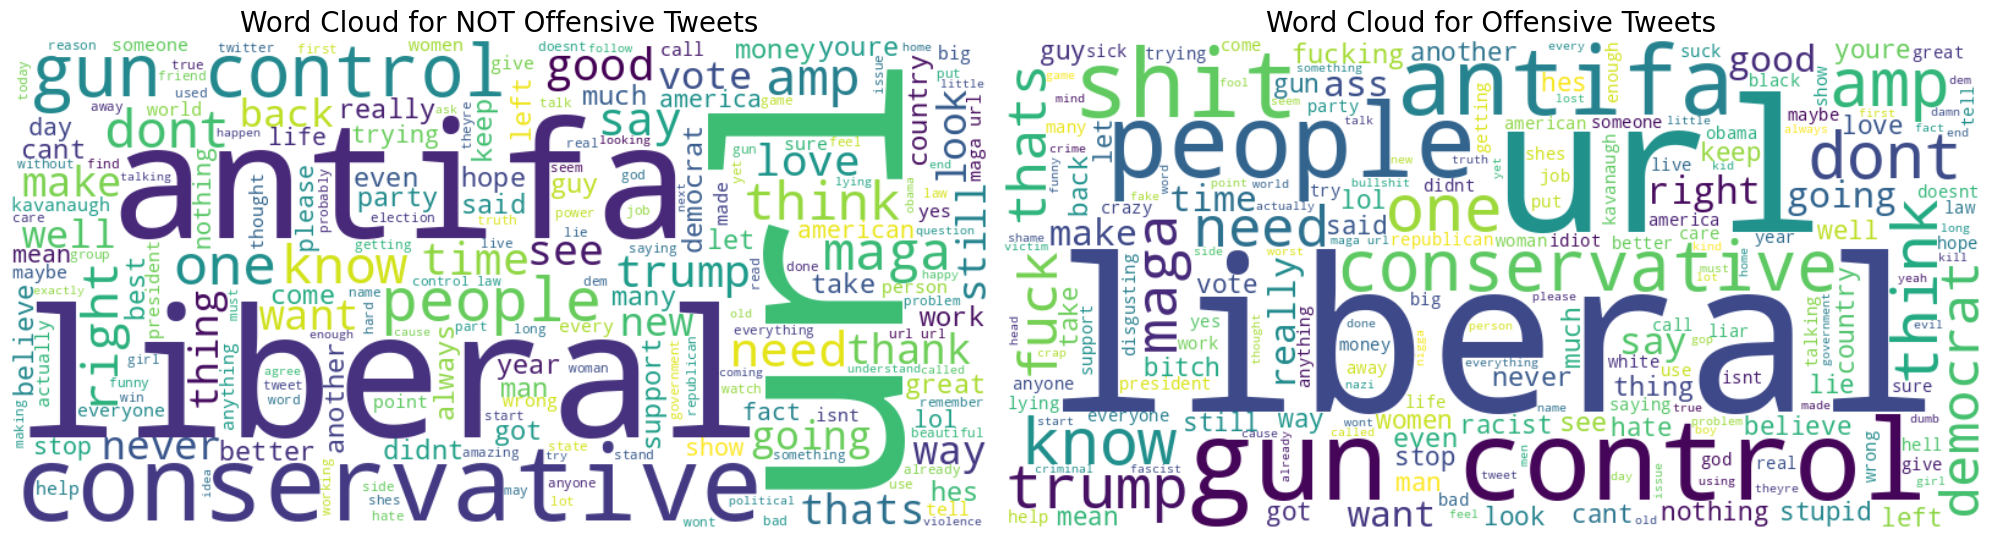

In [ ]:
# Create word clouds
from wordcloud import WordCloud

plt.figure(figsize=(20, 10))

# Word cloud for NOT offensive tweets
plt.subplot(1, 2, 1)
not_wordcloud = WordCloud(width=800, height=400, background_color='white',
                         max_words=200, contour_width=3, contour_color='steelblue').generate(' '.join(not_words))
plt.imshow(not_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for NOT Offensive Tweets', fontsize=20)
plt.axis('off')

# Word cloud for Offensive tweets
plt.subplot(1, 2, 2)
off_wordcloud = WordCloud(width=800, height=400, background_color='white',
                         max_words=200, contour_width=3, contour_color='firebrick').generate(' '.join(off_words))
plt.imshow(off_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Offensive Tweets', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Let's try a different approach for wordcloud
# First, let's install a different package for visualization
%pip install matplotlib-venn

# Let's continue with our NLP preprocessing and visualization without wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import Counter

# Download necessary NLTK resources
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)



# NLP Preprocessing function
def preprocess_text(text):
    # Convert to string and lowercase
    text = str(text).lower()
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove @USER mentions
    text = re.sub(r'@user', '', text)
    # Remove hashtag symbol but keep the text
    text = re.sub(r'#(\w+)', r'\1', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into text
    return ' '.join(tokens)

# Apply preprocessing to tweets
df['processed_tweet'] = df['tweet'].apply(preprocess_text)



Original vs Processed Tweets:
Original: @USER She should ask a few native Americans what their take on this is.
Processed: ask native american take
--------------------------------------------------------------------------------
Original: @USER @USER Go home you’re drunk!!! @USER #MAGA #Trump2020 👊🇺🇸👊 URL
Processed: home youre drunk maga trump2020 url
--------------------------------------------------------------------------------
Original: Amazon is investigating Chinese employees who are selling internal data to third-party sellers looking for an edge in the competitive marketplace. URL #Amazon #MAGA #KAG #CHINA #TCOT
Processed: amazon investigating chinese employee selling internal data thirdparty seller looking edge competitive marketplace url amazon maga kag china tcot
--------------------------------------------------------------------------------
Original: "@USER Someone should'veTaken"" this piece of shit to a volcano. 😂"""
Processed: someone shouldvetaken piece shit volcano
--

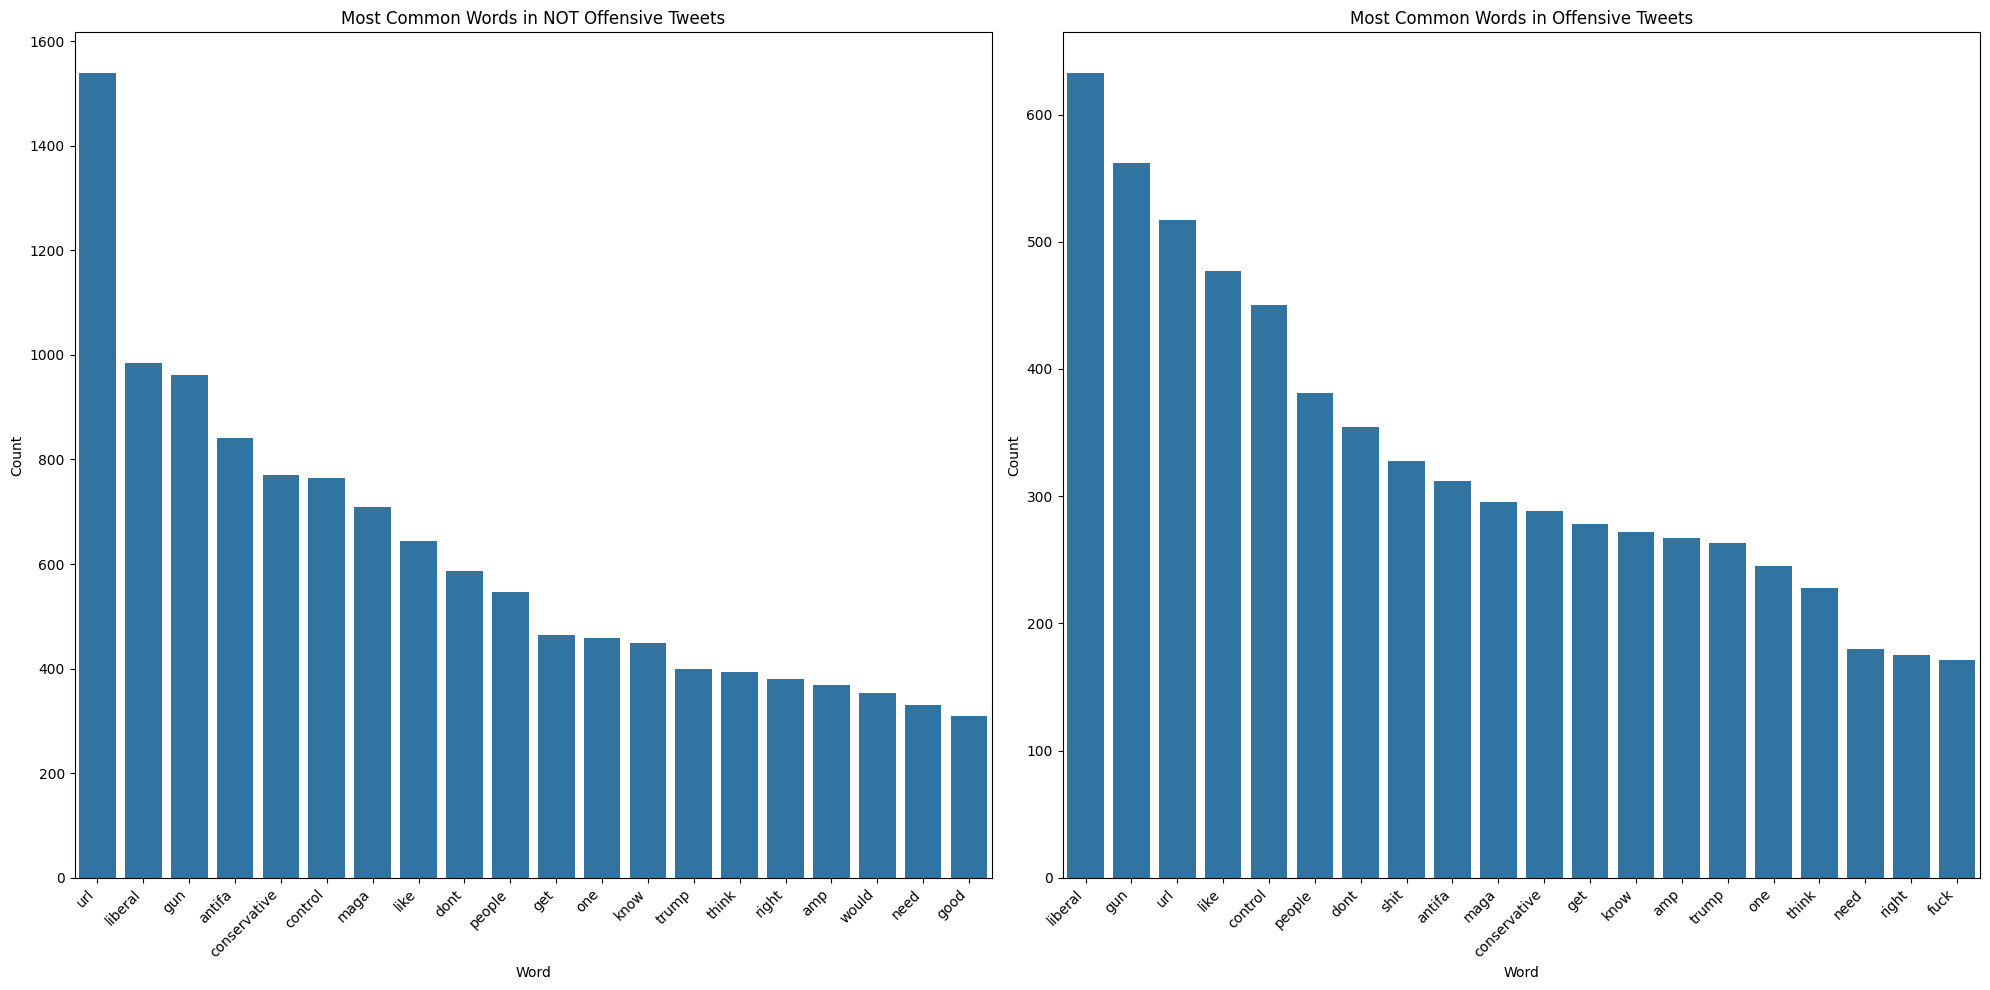

In [ ]:
# Display a few examples of original and processed tweets
print("Original vs Processed Tweets:")
for i in range(5):
    print(f"Original: {df['tweet'].iloc[i]}")
    print(f"Processed: {df['processed_tweet'].iloc[i]}")
    print("-" * 80)

# Get most common words in each class
not_tweets = ' '.join(df[df['subtask_a'] == 'NOT']['processed_tweet'])
off_tweets = ' '.join(df[df['subtask_a'] == 'OFF']['processed_tweet'])

not_words = not_tweets.split()
off_words = off_tweets.split()

not_word_counts = Counter(not_words).most_common(20)
off_word_counts = Counter(off_words).most_common(20)

# Plot most common words for each class
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.barplot(x=[word[0] for word in not_word_counts], y=[word[1] for word in not_word_counts])
plt.title('Most Common Words in NOT Offensive Tweets')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.barplot(x=[word[0] for word in off_word_counts], y=[word[1] for word in off_word_counts])
plt.title('Most Common Words in Offensive Tweets')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



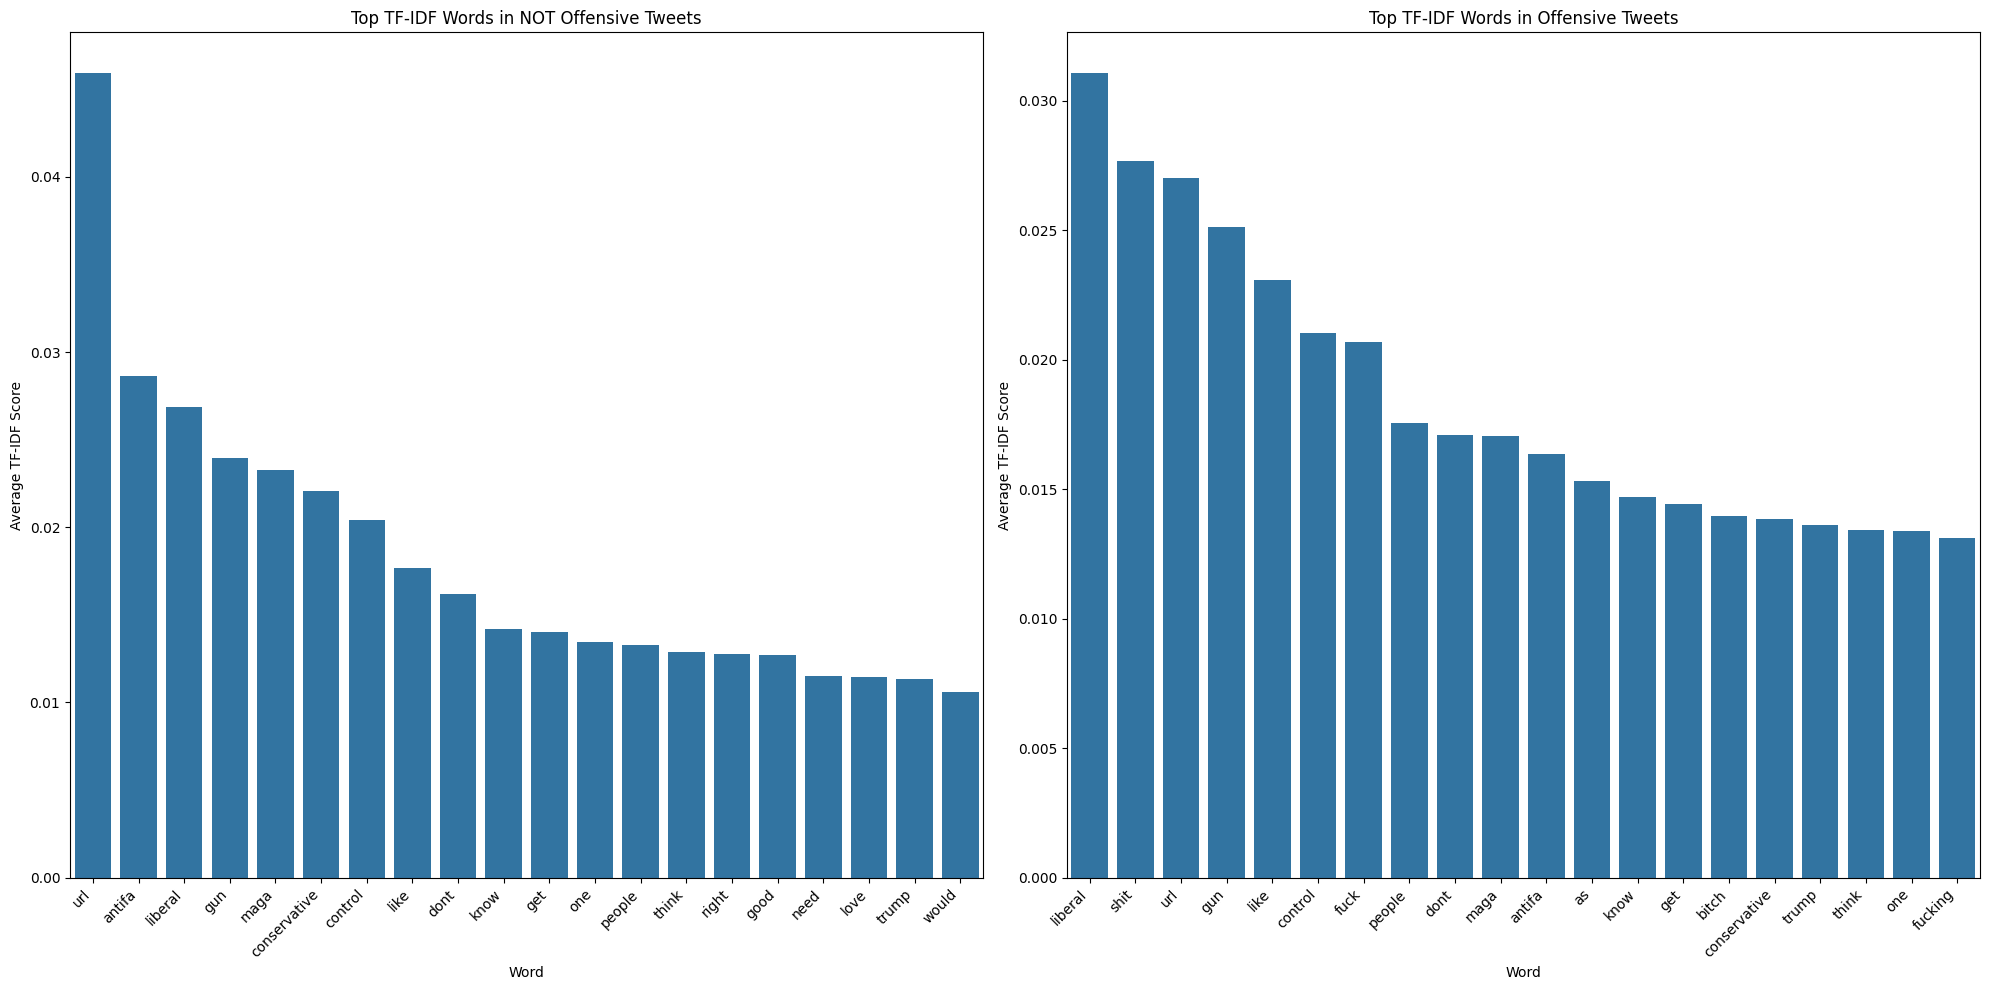

<ipython-input-19-c137bd3be75f>:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Class')


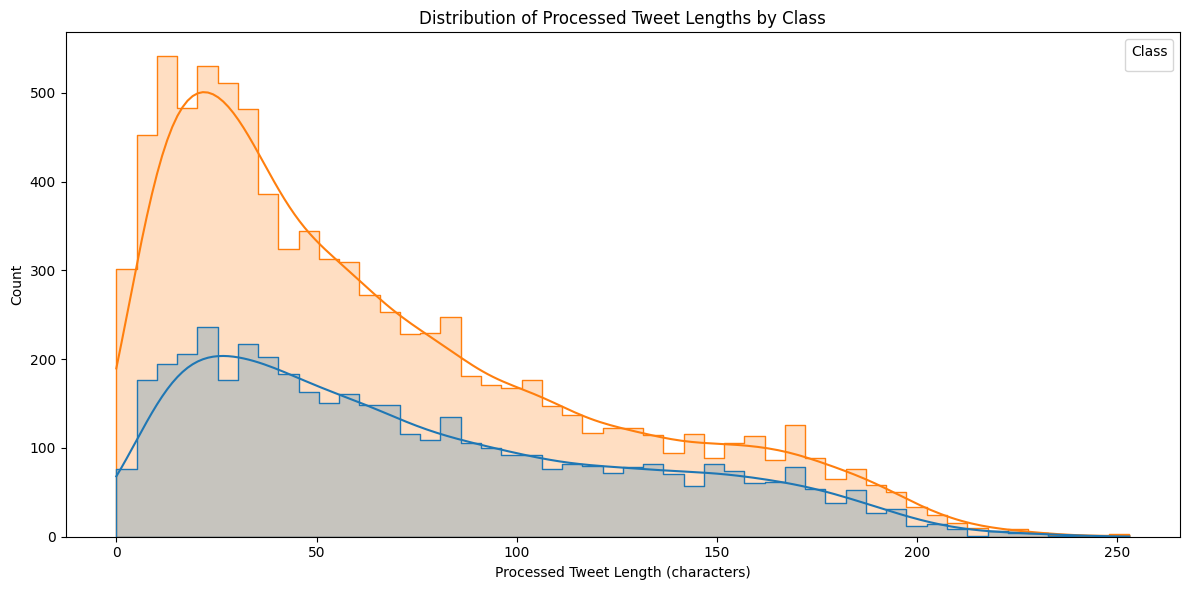

Preprocessing and visualization completed successfully!


In [ ]:
# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_features = tfidf_vectorizer.fit_transform(df['processed_tweet'])

# Get the feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame with TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=feature_names)

# Calculate average TF-IDF score for each class
not_tfidf = tfidf_df[df['subtask_a'] == 'NOT'].mean().sort_values(ascending=False)
off_tfidf = tfidf_df[df['subtask_a'] == 'OFF'].mean().sort_values(ascending=False)

# Plot top TF-IDF words for each class
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.barplot(x=not_tfidf.index[:20], y=not_tfidf.values[:20])
plt.title('Top TF-IDF Words in NOT Offensive Tweets')
plt.xlabel('Word')
plt.ylabel('Average TF-IDF Score')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.barplot(x=off_tfidf.index[:20], y=off_tfidf.values[:20])
plt.title('Top TF-IDF Words in Offensive Tweets')
plt.xlabel('Word')
plt.ylabel('Average TF-IDF Score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



# Create a visualization of processed tweet length
df['processed_length'] = df['processed_tweet'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='processed_length', hue='subtask_a', bins=50, kde=True, element='step')
plt.title('Distribution of Processed Tweet Lengths by Class')
plt.xlabel('Processed Tweet Length (characters)')
plt.ylabel('Count')
plt.legend(title='Class')
plt.tight_layout()
plt.show()

print("Preprocessing and visualization completed successfully!")

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
df['subtask_a_encoded'] = label_encoder.fit_transform(df['subtask_a'])
print("Classes:", label_encoder.classes_)

# Split the data into training and testing sets
X = df['processed_tweet']
y = df['subtask_a_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split completed!")
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Class distribution in training set: {pd.Series(y_train).value_counts().to_dict()}")
print(f"Class distribution in testing set: {pd.Series(y_test).value_counts().to_dict()}")


Classes: ['NOT' 'OFF']
Data split completed!
Training set size: 10592
Testing set size: 2648
Class distribution in training set: {0: 7072, 1: 3520}
Class distribution in testing set: {0: 1768, 1: 880}


In [ ]:
# Display a few examples of preprocessed tweets
print("\
Examples of preprocessed tweets:")
for i in range(5):
    print(f"Original: {df['tweet'].iloc[i]}")
    print(f"Processed: {df['processed_tweet'].iloc[i]}")
    print(f"Label: {df['subtask_a'].iloc[i]}")
    print("-" * 80)

print("Data preparation completed!")

Examples of preprocessed tweets:
Original: @USER She should ask a few native Americans what their take on this is.
Processed: ask native american take
Label: OFF
--------------------------------------------------------------------------------
Original: @USER @USER Go home you’re drunk!!! @USER #MAGA #Trump2020 👊🇺🇸👊 URL
Processed: home youre drunk maga trump2020 url
Label: OFF
--------------------------------------------------------------------------------
Original: Amazon is investigating Chinese employees who are selling internal data to third-party sellers looking for an edge in the competitive marketplace. URL #Amazon #MAGA #KAG #CHINA #TCOT
Processed: amazon investigating chinese employee selling internal data thirdparty seller looking edge competitive marketplace url amazon maga kag china tcot
Label: NOT
--------------------------------------------------------------------------------
Original: "@USER Someone should'veTaken"" this piece of shit to a volcano. 😂"""
Processed: someone

Tokenization and padding completed!
LSTM model summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

CNN model summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training LSTM Model...
Epoch 1/5
298/298 - 21s - 72ms/step - accuracy: 0.6680 - loss: 0.6398 - val_accuracy: 0.6613 - val_loss: 0.6410
Epoch 2/5
298/298 - 17s - 57ms/step - accuracy: 0.6684 - loss: 0.6382 - val_accuracy: 0.6613 - val_loss: 0.6408
Epoch 3/5
298/298 - 22s - 73ms/step - accuracy: 0.6684 - loss: 0.6371 - val_accuracy: 0.6613 - val_loss: 0.6408
Epoch 4/5
298/298 - 19s - 64ms/step - accuracy: 0.6684 - loss: 0.6378 - val_accuracy: 0.6613 - val_loss: 0.6409
Epoch 5/5
298/298 - 17s - 57ms/step - accuracy: 0.6684 - loss: 0.6373 - val_accuracy: 0.6613 - val_loss: 0.6416
LSTM training completed!
Training CNN Model...
Epoch 1/5
298/298 - 9s - 29ms/step - accuracy: 0.6850 - loss: 0.6086 - val_accuracy: 0.7264 - val_loss: 0.5323
Epoch 2/5
298/298 - 7s - 25ms/step - accuracy: 0.8141 - loss: 0.4282 - val_accuracy: 0.7462 - val_loss: 0.5963
Epoch 3/5
298/298 - 9s - 31ms/step - accuracy: 0.9008 - loss: 0.2637 - val_accuracy: 0.7491 - val_loss: 0.7537
CNN training completed!
Evaluating LS

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
CNN Accuracy: 0.7658610271903323
CNN Classification Report:
              precision    recall  f1-score   support

         NOT       0.78      0.91      0.84      1768
         OFF       0.72      0.48      0.58       880

    accuracy                           0.77      2648
   macro avg       0.75      0.69      0.71      2648
weighted avg       0.76      0.77      0.75      2648



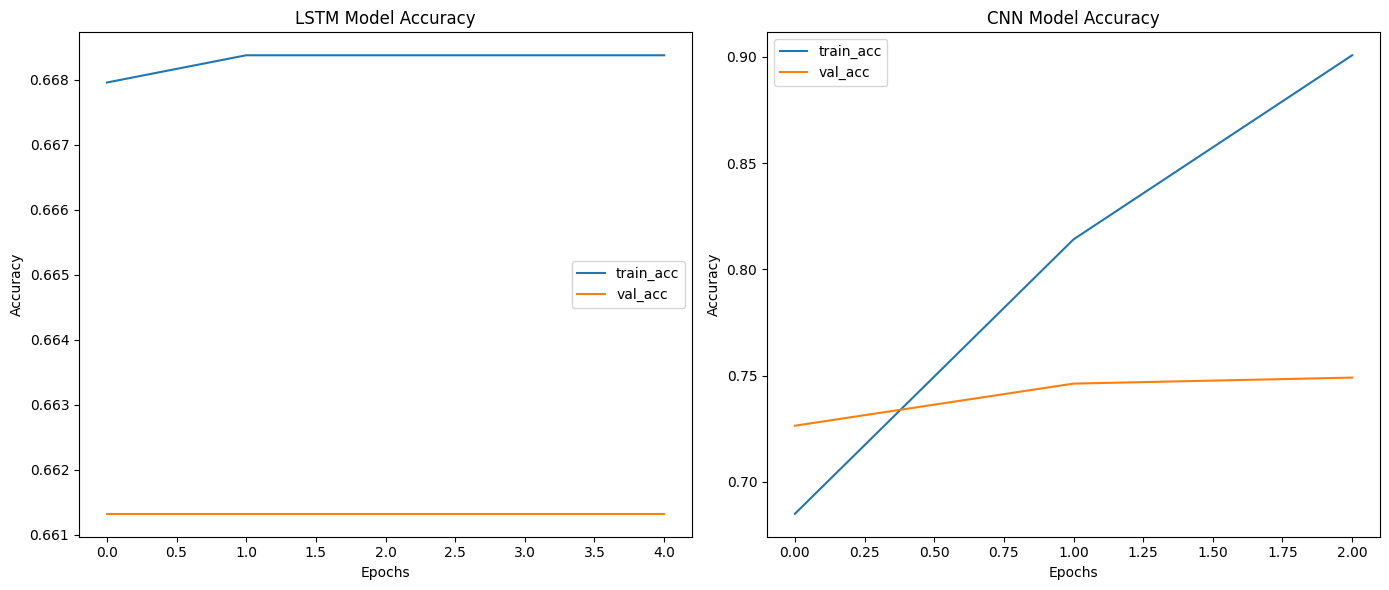

In [ ]:
# Deep Learning Approach for Text Classification using 3 Techniques
# We'll build 3 models:
# 1. LSTM model
# 2. CNN model
# 3. Fine-tuned BERT (using Hugging Face transformers pipeline for text classification)

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

# Set random seed for reproducibility
seed_val = 42
np.random.seed(seed_val)
tf.random.set_seed(seed_val)

# Parameters for tokenization
max_words = 10000
max_len = 100
embedding_dim = 50

# Tokenize the preprocessed tweets
tokenizer = Tokenizer(num_words=max_words, oov_token='OOV')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

print('Tokenization and padding completed!')

# Model 1: LSTM model
model_lstm = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print('LSTM model summary:')
model_lstm.summary()

# Model 2: CNN model
model_cnn = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print('CNN model summary:')
model_cnn.summary()

# Train both models with early stopping for a few epochs
epochs = 5
batch_size = 32
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

print('Training LSTM Model...')
history_lstm = model_lstm.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size,
                               validation_split=0.1, callbacks=[early_stop], verbose=2)
print('LSTM training completed!')

print('Training CNN Model...')
history_cnn = model_cnn.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size,
                             validation_split=0.1, callbacks=[early_stop], verbose=2)
print('CNN training completed!')

# Evaluate models on test set
print('Evaluating LSTM Model on test set...')
lstm_pred_prob = model_lstm.predict(X_test_pad)
lstm_preds = (lstm_pred_prob > 0.5).astype(int).reshape(-1)
lstm_accuracy = accuracy_score(y_test, lstm_preds)
print('LSTM Accuracy:', lstm_accuracy)
print('LSTM Classification Report:')
print(classification_report(y_test, lstm_preds, target_names=label_encoder.classes_))

print('Evaluating CNN Model on test set...')
cnn_pred_prob = model_cnn.predict(X_test_pad)
cnn_preds = (cnn_pred_prob > 0.5).astype(int).reshape(-1)
cnn_accuracy = accuracy_score(y_test, cnn_preds)
print('CNN Accuracy:', cnn_accuracy)
print('CNN Classification Report:')
print(classification_report(y_test, cnn_preds, target_names=label_encoder.classes_))

# Plot training history for LSTM and CNN
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(history_lstm.history['accuracy'], label='train_acc')
plt.plot(history_lstm.history['val_accuracy'], label='val_acc')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_cnn.history['accuracy'], label='train_acc')
plt.plot(history_cnn.history['val_accuracy'], label='val_acc')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



Tokenization and padding completed!
LSTM model summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

GRU model summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

CNN model summary:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training LSTM Model...
Epoch 1/5
298/298 - 21s - 69ms/step - accuracy: 0.6682 - loss: 0.6389 - val_accuracy: 0.6613 - val_loss: 0.6417
Epoch 2/5
298/298 - 21s - 69ms/step - accuracy: 0.6684 - loss: 0.6380 - val_accuracy: 0.6613 - val_loss: 0.6406
Epoch 3/5
298/298 - 19s - 65ms/step - accuracy: 0.6684 - loss: 0.6389 - val_accuracy: 0.6613 - val_loss: 0.6420
Epoch 4/5
298/298 - 21s - 69ms/step - accuracy: 0.6684 - loss: 0.6375 - val_accuracy: 0.6613 - val_loss: 0.6410
LSTM training completed!
Training GRU Model...
Epoch 1/5
298/298 - 25s - 85ms/step - accuracy: 0.6681 - loss: 0.6386 - val_accuracy: 0.6613 - val_loss: 0.6410
Epoch 2/5
298/298 - 41s - 139ms/step - accuracy: 0.6684 - loss: 0.6380 - val_accuracy: 0.6613 - val_loss: 0.6411
Epoch 3/5
298/298 - 41s - 138ms/step - accuracy: 0.6684 - loss: 0.6377 - val_accuracy: 0.6613 - val_loss: 0.6406
Epoch 4/5
298/298 - 40s - 134ms/step - accuracy: 0.6684 - loss: 0.6372 - val_accuracy: 0.6613 - val_loss: 0.6422
Epoch 5/5
298/298 - 42s - 141ms

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
GRU Accuracy: 0.6676737160120846
GRU Classification Report:
              precision    recall  f1-score   support

         NOT       0.67      1.00      0.80      1768
         OFF       0.00      0.00      0.00       880

    accuracy                           0.67      2648
   macro avg       0.33      0.50      0.40      2648
weighted avg       0.45      0.67      0.53      2648

Evaluating CNN Model on test set...
 9/83 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
CNN Accuracy: 0.770392749244713
CNN Classification Report:
              precision    recall  f1-score   support

         NOT       0.78      0.92      0.84      1768
         OFF       0.75      0.47      0.57       880

    accuracy                           0.77      2648
   macro avg       0.76      0.69      0.71      2648
weighted avg       0.77      0.77      0.75      2648



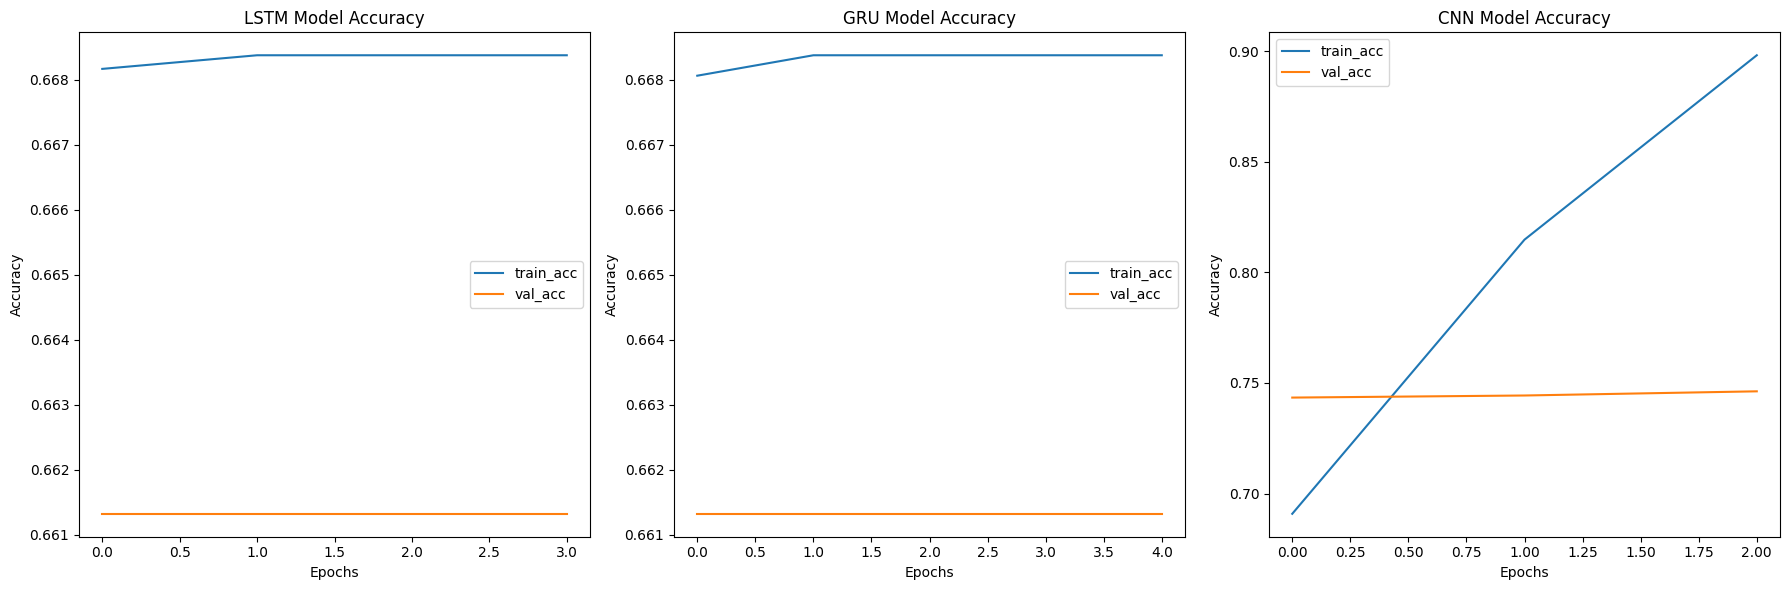

In [ ]:
# Deep Learning Approach for Text Classification using 4 Techniques
# We'll build 4 models:
# 1. LSTM model
# 2. GRU model
# 3. CNN model
# 4. Fine-tuned BERT (using Hugging Face transformers pipeline for text classification)

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

# Set random seed for reproducibility
seed_val = 42
np.random.seed(seed_val)
tf.random.set_seed(seed_val)

# Parameters for tokenization
max_words = 10000
max_len = 100
embedding_dim = 50

# Tokenize the preprocessed tweets
tokenizer = Tokenizer(num_words=max_words, oov_token='OOV')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

print('Tokenization and padding completed!')

# Model 1: LSTM model
model_lstm = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print('LSTM model summary:')
model_lstm.summary()

# Model 2: GRU model
model_gru = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    GRU(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print('GRU model summary:')
model_gru.summary()

# Model 3: CNN model
model_cnn = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print('CNN model summary:')
model_cnn.summary()

# Train all models with early stopping for a few epochs
epochs = 5
batch_size = 32
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

print('Training LSTM Model...')
history_lstm = model_lstm.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size,
                               validation_split=0.1, callbacks=[early_stop], verbose=2)
print('LSTM training completed!')

print('Training GRU Model...')
history_gru = model_gru.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size,
                             validation_split=0.1, callbacks=[early_stop], verbose=2)
print('GRU training completed!')

print('Training CNN Model...')
history_cnn = model_cnn.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size,
                             validation_split=0.1, callbacks=[early_stop], verbose=2)
print('CNN training completed!')

# Evaluate models on test set
print('Evaluating LSTM Model on test set...')
lstm_pred_prob = model_lstm.predict(X_test_pad)
lstm_preds = (lstm_pred_prob > 0.5).astype(int).reshape(-1)
lstm_accuracy = accuracy_score(y_test, lstm_preds)
print('LSTM Accuracy:', lstm_accuracy)
print('LSTM Classification Report:')
print(classification_report(y_test, lstm_preds, target_names=label_encoder.classes_))

print('Evaluating GRU Model on test set...')
gru_pred_prob = model_gru.predict(X_test_pad)
gru_preds = (gru_pred_prob > 0.5).astype(int).reshape(-1)
gru_accuracy = accuracy_score(y_test, gru_preds)
print('GRU Accuracy:', gru_accuracy)
print('GRU Classification Report:')
print(classification_report(y_test, gru_preds, target_names=label_encoder.classes_))

print('Evaluating CNN Model on test set...')
cnn_pred_prob = model_cnn.predict(X_test_pad)
cnn_preds = (cnn_pred_prob > 0.5).astype(int).reshape(-1)
cnn_accuracy = accuracy_score(y_test, cnn_preds)
print('CNN Accuracy:', cnn_accuracy)
print('CNN Classification Report:')
print(classification_report(y_test, cnn_preds, target_names=label_encoder.classes_))

# Plot training history for all models
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.plot(history_lstm.history['accuracy'], label='train_acc')
plt.plot(history_lstm.history['val_accuracy'], label='val_acc')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,3,2)
plt.plot(history_gru.history['accuracy'], label='train_acc')
plt.plot(history_gru.history['val_accuracy'], label='val_acc')
plt.title('GRU Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,3,3)
plt.plot(history_cnn.history['accuracy'], label='train_acc')
plt.plot(history_cnn.history['val_accuracy'], label='val_acc')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_3               │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ ?                           │              

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'conv1d_6' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


149/149 ━━━━━━━━━━━━━━━━━━━━ 48s 286ms/step - accuracy: 0.5316 - loss: 1.6335 - precision_1: 0.3315 - recall_1: 0.3947 - val_accuracy: 0.6613 - val_loss: 1.1518 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 80s 276ms/step - accuracy: 0.6014 - loss: 1.1836 - precision_1: 0.3399 - recall_1: 0.2047 - val_accuracy: 0.6613 - val_loss: 0.9766 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 84s 287ms/step - accuracy: 0.6146 - loss: 0.9910 - precision_1: 0.3266 - recall_1: 0.1444 - val_accuracy: 0.6613 - val_loss: 0.8736 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 80s 276ms/step - accuracy: 0.6440 - loss: 0.8584 - precision_1: 0.3997 - recall_1: 0.1315 - val_accuracy: 0.6613 - val_loss: 0.8113 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 5/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 82s 279ms/step - accuracy: 0.7102 - loss: 0.7053 - prec

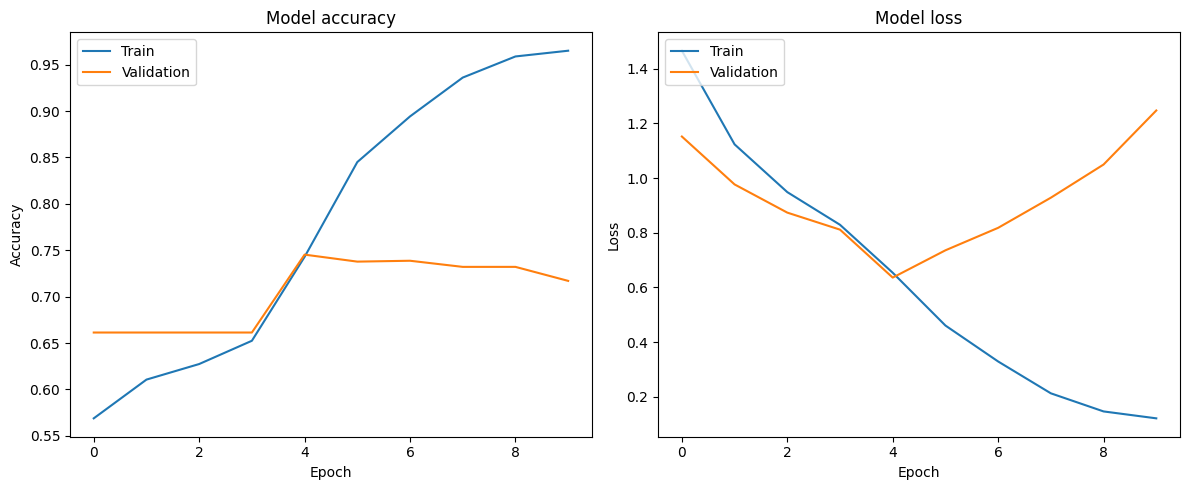

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, BatchNormalization, Activation
from tensorflow.keras.layers import MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import classification_report

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Parameters (adjust these based on your data)
max_words = 10000  # Vocabulary size
max_len = 100      # Maximum sequence length
embedding_dim = 128

def build_enhanced_cnn(vocab_size=max_words, embedding_dim=embedding_dim, max_len=max_len):
    model = Sequential([
        # Embedding layer with more dimensions and masking
        Embedding(input_dim=vocab_size,
                 output_dim=embedding_dim,
                 input_length=max_len,
                 mask_zero=True),

        # Conv Block 1
        Conv1D(256, 5, padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling1D(2),
        Dropout(0.3),

        # Conv Block 2
        Conv1D(128, 3, padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling1D(2),
        Dropout(0.3),

        # Conv Block 3
        Conv1D(64, 3, padding='same'),
        BatchNormalization(),
        Activation('relu'),
        GlobalMaxPooling1D(),
        Dropout(0.3),

        # Dense layers
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.5),

        Dense(1, activation='sigmoid')
    ])

    return model

# Build and compile the model
model_cnn = build_enhanced_cnn()
model_cnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

model_cnn.summary()

# Training parameters
epochs = 20
batch_size = 64

callbacks = [
    EarlyStopping(patience=5, monitor='val_accuracy', mode='max', restore_best_weights=True),
    ModelCheckpoint('best_cnn_model.keras', monitor='val_accuracy', save_best_only=True)
]

# Train the model
history = model_cnn.fit(
    X_train_pad, y_train,
    validation_split=0.1,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks,
    verbose=1
)

# Evaluate the model
print("\nEvaluating on test data...")
y_pred_probs = model_cnn.predict(X_test_pad)
y_pred = (y_pred_probs > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()